In [ ]:
!pip install graphzoo
!pip install torch_geometric
!pip install torch-geometric networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
import torch
import warnings
import graphzoo as gz
import networkx as nx
import matplotlib.pyplot as plt
from graphzoo.config import parser
from torch_geometric.datasets import Planetoid
warnings.filterwarnings("ignore")

dataset = Planetoid(root='data/cora', name='cora')
data = dataset[0]
print(f'Dataset: {dataset}:')

G = nx.Graph()
G.add_nodes_from(range(data.num_nodes))
edge_index = data.edge_index.to("cpu")
G.add_edges_from(edge_index.t().tolist())

Dataset: cora():


Processing...
Done!


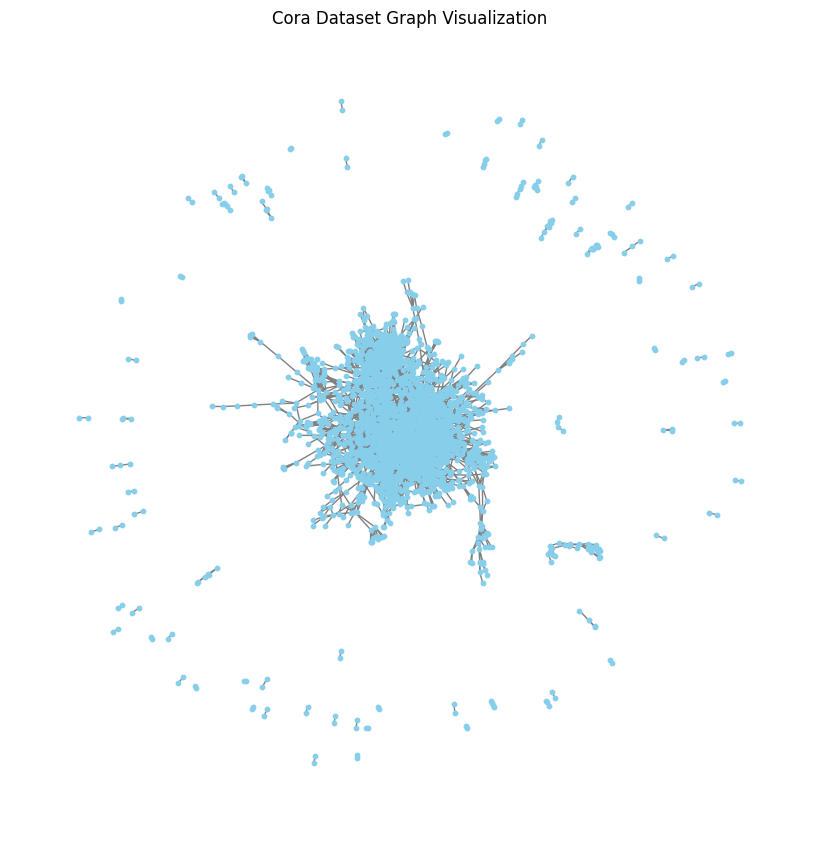

In [ ]:
pos = nx.spring_layout(G, seed=42)  # Layout for node positions
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=False, node_size=10, node_color="skyblue", edge_color="gray")
plt.title("Cora Dataset Graph Visualization")
plt.show()

In [ ]:
params = parser.parse_args(args=[])
params.dataset='cora'
params.datapath='data/cora'

params.task='nc'
params.model='HGCN'
params.manifold='PoincareBall'
params.dim=128

params.lr=0.01
params.weight_decay=0.001
params.dropout=0.5

data = gz.dataloader.DataLoader(params)

model= gz.models.NCModel(params)
optimizer = gz.optimizers.RiemannianAdam(params=model.parameters(),
                                         lr=params.lr, weight_decay=params.weight_decay)

In [ ]:
trainer=gz.trainers.Trainer(params,model,optimizer,data)
trainer.run()
trainer.evaluate()

INFO:root:Using: cpu
INFO:root:Using seed 1234.
INFO:root:NCModel(
  (encoder): GCN(
    (layers): Sequential(
      (0): GraphConvolution(
        input_dim=1433, output_dim=128
        (linear): Linear(in_features=1433, out_features=128, bias=True)
      )
    )
  )
  (decoder): GCNDecoder(
    (cls): GraphConvolution(
      input_dim=128, output_dim=7
      (linear): Linear(in_features=128, out_features=7, bias=True)
    )
  )
)
INFO:root:Total number of parameters: 184455
INFO:root:Epoch: 0005 lr: 0.01 train_loss: 1.9513 train_acc: 0.1000 train_f1: 0.1000 time: 0.0308s
INFO:root:Epoch: 0005 val_loss: 1.9695 val_acc: 0.0580 val_f1: 0.0580
INFO:root:Epoch: 0010 lr: 0.01 train_loss: 1.9440 train_acc: 0.1214 train_f1: 0.1214 time: 0.0402s
INFO:root:Epoch: 0010 val_loss: 1.9594 val_acc: 0.0580 val_f1: 0.0580
INFO:root:Epoch: 0015 lr: 0.01 train_loss: 1.9400 train_acc: 0.2071 train_f1: 0.2071 time: 0.1411s
INFO:root:Epoch: 0015 val_loss: 1.9457 val_acc: 0.1880 val_f1: 0.1880
INFO:root:Ep

{'loss': tensor(0.9933, grad_fn=<NllLossBackward0>), 'acc': 0.806, 'f1': 0.806}